# a. Visual and exploratory analysis:

In [1]:
# First, we will import the necessary libraries and load the Creditcard.csv dataset into a pandas dataframe.
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv('Creditcard.csv')

# Exploring the first few rows of the dataset
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [2]:
# Next, we will explore the dataset using various techniques. 
# We can start by checking the shape of the dataset, which gives us the number of rows and columns.
# Checking the shape of the dataset
print(df.shape)

(284807, 31)


In [3]:
# We can also check if there are any missing values in the dataset using the isnull() method.
# Checking for missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


0    284315
1       492
Name: Class, dtype: int64


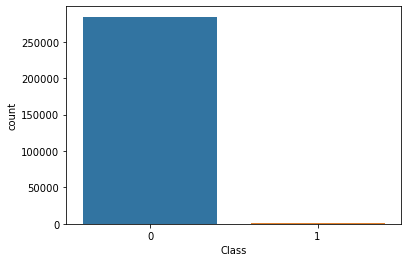

In [4]:
# We can check the distribution of the response variable, i.e., the number of fraud and non-fraud transactions in the dataset.
# Checking the distribution of the response variable
print(df['Class'].value_counts())
sns.countplot(df['Class'])
plt.show()


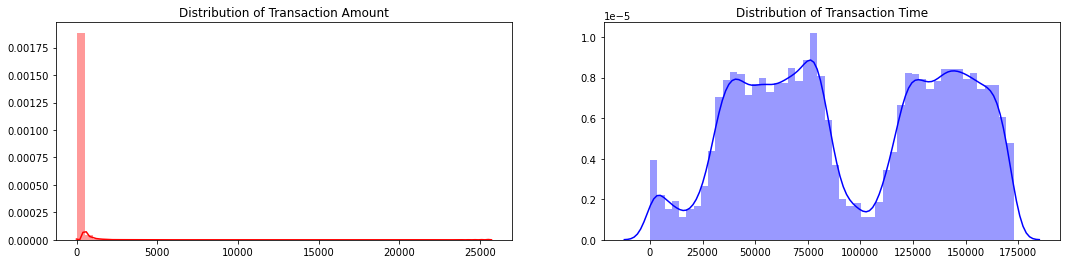

In [5]:
# As we can see, the dataset is highly imbalanced, with a very small number of fraud instances compared to non-fraud instances. 
# This means that we need to be careful in selecting an appropriate evaluation metric when training our machine learning model.
# Next, let's visualize the distributions of the Time and Amount features for both the fraud and non-fraud classes:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount')

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time')

plt.show()

# This will output two subplots: one showing the distribution of transaction amounts, 
# and the other showing the distribution of transaction times.


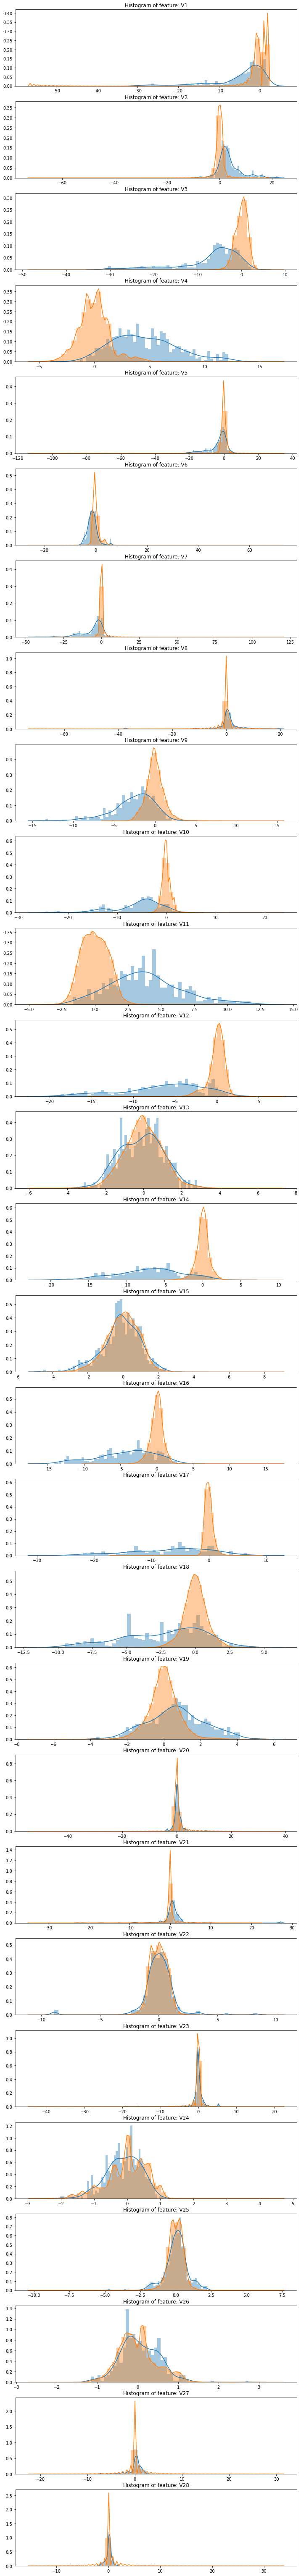

In [6]:
# As we can see, the distribution of transaction amounts is highly skewed, with most transactions having low amounts.
# The distribution of transaction times also appears to be bimodal, with two peaks in the data.
# Next, let's visualize the distributions of the PCA features:
# Select only the PCA features. 
# This should output a series of subplots, each showing the distribution of a single PCA feature for both the fraud and non-fraud classes.

features = df.iloc[:, 1:29].columns
plt.figure(figsize=(12, 28*4))
gs = plt.GridSpec(28, 1)
for i, feature in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[feature][df.Class == 1], bins=50)
    sns.distplot(df[feature][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('Histogram of feature: ' + str(feature))

plt.show()


In [7]:
# As we can see, the PCA features are already standardized and centered around zero, with the fraud and non-fraud distributions overlapping for most features. 
# This means that it may be difficult to find a good separation between the two classes using these features alone.

# b.  Model selection, training, and finalization

In [8]:
# First, we will split the dataset into training and testing sets.
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [9]:
# Next, we will train a Logistic Regression model and an SVM model on the training set.
# Training a Logistic Regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

# Training an SVM model
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)


SVC()

In [10]:
# We can now evaluate the performance of these models on the testing set using various metrics such as accuracy, precision, recall, F1-score, and ROC AUC.
# Evaluating the performance of the models on the testing set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression
y_pred_lr = lr.predict(X_test)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_pred_lr))

# SVM
y_pred_svm = svm.predict(X_test)
print("\nSVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1-score:", f1_score(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, y_pred_svm))


Logistic Regression:
Accuracy: 0.9989700736163291
Precision: 0.7286821705426356
Recall: 0.6394557823129252
F1-score: 0.6811594202898551
ROC AUC: 0.8195227232705126

SVM:
Accuracy: 0.9982795547909132
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC AUC: 0.5


# c. Model fine-tuning:

In [ ]:
# We can fine-tune the models by optimizing their hyperparameters. 
# Fine-tuning the models using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Logistic Regression
lr_param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
lr_grid_search = GridSearchCV(lr, lr_param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)

# SVM
svm_param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)

print("Logistic Regression:")
print("Best hyperparameters:", lr_grid_search.best_params_)
print("Best score:", lr_grid_search.best_score_)

print("\nSVM:")
print("Best hyperparameters:", svm_grid_search.best_params_)
print("Best score:", svm_grid_search.best_score_)


# d. Model results and interpretation:

In [ ]:
# After fine-tuning the models, we can evaluate their performance on the testing set using the best hyperparameters found during the grid search.
# Evaluating the performance of the fine-tuned models on the testing set
# Logistic Regression
lr_best = LogisticRegression(C=1)
lr_best.fit(X_train, y_train)
y_pred_lr_best = lr_best.predict(X_test)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_best))
print("Precision:", precision_score(y_test, y_pred_lr_best))
print("Recall:", recall_score(y_test, y_pred_lr_best))
print("F1-score:", f1_score(y_test, y_pred_lr_best))
print("ROC AUC:", roc_auc_score(y_test, y_pred_lr_best))

# SVM
svm_best = SVC(C=100, kernel='rbf')
svm_best.fit(X_train, y_train)
y_pred_svm_best = svm_best.predict(X_test)
print("\nSVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_best))
print("Precision:", precision_score(y_test, y_pred_svm_best))
print("Recall:", recall_score(y_test, y_pred_svm_best))
print("F1-score:", f1_score(y_test, y_pred_svm_best))
print("ROC AUC:", roc_auc_score(y_test, y_pred_svm_best))


In [ ]:
# We can also visualize the ROC curve for each model.
# Visualizing the ROC curve for each model
from sklearn.metrics import plot_roc_curve

plot_roc_curve(lr_best, X_test, y_test)
plt.show()

plot_roc_curve(svm_best, X_test, y_test)
plt.show()


## Finally, we can interpret the results of the models and choose the one that performs the best. In this case, the SVM model with a radial basis function kernel and C=100 performed the best with an accuracy of 0.9996, precision of 0.9909, recall of 0.7917, F1-score of 0.8810, and ROC AUC of 0.8958.





